# Data Challenge
This notebook analyzed the fraud dataset. The analyses include the following sections: 1. data summary, 2. data wrangling and feature engineering, 3.data exploration, 4. compared and validated the performances of LogisticRegression and RandomForest classifier models to detect frauds and 5. analyzed which features are important to predict fraud.

## Analysis Contents
  ### [1. Data Summary](#data_summary)
  ### [2. Data Wrangling and Feature Engineering](#data_clean)
  ### [3. Data Exploration](#data_exploration)
  ### [4. Machine Learning](#machine_learning)
  ### [5. Feature Analysis](#feature_analysis)
  ### [6. Summary](#summary)

<a id='data_summary'></a>
### 1. Data Summary

#### 1.1 Summary of fraud data

In [1]:
# import libraries for the analysis
import pandas as pd
# get data path
data_path = 'Fraud/Fraud_Data.csv'
# read fraud data into the pandas dataframe
data = pd.read_csv(data_path)
# examine the data
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [2]:
# examine how many data points and columns in the dataset
print 'There are %d rows and %d columns in fraud dataset.'%(data.shape[0], data.shape[1])

There are 151112 rows and 11 columns in fraud dataset.


In [3]:
# examine the data types of the data
data.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
# examine the range of numeric features - purchase value and age
data[['purchase_value', 'age', 'ip_address']].describe()

,purchase_value,age,ip_address
count,151112.000000,151112.000000,1.511120e+05
mean,36.935372,33.140704,2.152145e+09
std,18.322762,8.617733,1.248497e+09
min,9.000000,18.000000,5.209350e+04
25%,22.000000,27.000000,1.085934e+09
50%,35.000000,33.000000,2.154770e+09
75%,49.000000,39.000000,3.243258e+09
max,154.000000,76.000000,4.294850e+09


In [6]:
data.groupby(['class']).count()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address
class,,,,,,,,,,
0,136961,136961,136961,136961,136961,136961,136961,136961,136961,136961
1,14151,14151,14151,14151,14151,14151,14151,14151,14151,14151


* For the fraud data, there are 11 columns and 151112 rows.
* No missing values in the dataset.
* The average purchase is 36.9, min purchase value is 9 and the max purchase value is 154.
* The average age of custumers is 33.1, min age is 18 and the max age is 76.
* There are 14151 cases with fraud and 136961 cases without fraud.

#### 1.2 IP address to country data

In [7]:
path = 'Fraud/IpAddress_to_Country.csv'
data_ip_to_country = pd.read_csv(path)
data_ip_to_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
# examine how many data points and columns in the dataset
print 'There are %d rows and %d columns in ip address dataset.'%(data_ip_to_country.shape[0], data_ip_to_country.shape[1])

There are 138846 rows and 3 columns in ip address dataset.


In [9]:
# examine the data types of the data
data_ip_to_country.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [10]:
# examine the data information
data_ip_to_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [11]:
data_ip_to_country.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


* For the IP address data, there are 3 columns and 138846 rows.
* No missing values in the dataset.

<a id='data_clean'></a>
### 2. Data Wrangling and Feature Engineering

#### 2.1 Mapping IP address to country name

In [12]:
# build a dictionary to map lower bound ip address and upper bound ip address to country name  
data_dict = data_ip_to_country.to_dict()
mapping_dict = {}
for i in xrange(data_ip_to_country.shape[0]):
    value = data_dict['country'][i]
    key = (data_dict['lower_bound_ip_address'][i], data_dict['upper_bound_ip_address'][i])
    mapping_dict[key] = value
# examine the mapping dict
j = 0
for key in mapping_dict:
    print key, mapping_dict[key]
    j += 1
    if j > 4:
        break

(3639320576.0, 3639324671) United States
(3334992384.0, 3334992895) United States
(3560595456.0, 3560603647) Georgia
(3562176512.0, 3562184703) France
(3423431680.0, 3423432703) United States


In [13]:
# mapping country name to fraud data 
def map_country_code(row, mapping_dict):
    ip = row['ip_address']
    for key in mapping_dict:
        if ip >= key[0] and ip <= key[1]:
            return mapping_dict[key]
    # unknow country
    return ''

In [14]:
data['country'] = data.apply(lambda row : map_country_code(row, mapping_dict), axis = 1)

In [15]:
# examine new feature in data
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [16]:
# because it's time comsuing to map country name, the new file is save
data.to_csv('Fraud/fraud_data_with_country.csv', index = False)

In [17]:
data = pd.read_csv('Fraud/fraud_data_with_country.csv')
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


#### 2.2 Duration between sign up and purchase

In [18]:
import numpy as np
import pandas as pd
data['time'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time']))/np.timedelta64(1, 'D')

In [19]:
data['time'] = data['time'].astype(np.int32)
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,52
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,5
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50


#### 2.3 Number of purchases from the same IP address on the same day

In [20]:
df_ip = data[['ip_address', 'time', 'user_id']].groupby(['ip_address', 'time']).count().reset_index()
df_ip.columns = ['ip_address', 'time', 'count_ip']

In [21]:
merged_data = pd.merge(data, df_ip, on = ['ip_address', 'time'], how = 'inner')
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time,count_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,52,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,11
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,11
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,11


#### 2.4 Number of purchases from the same device id on the same day

In [22]:
df_device = data[['device_id', 'time', 'user_id']].groupby(['device_id', 'time']).count().reset_index()
df_device.columns = ['device_id', 'time', 'count_device']

In [23]:
merged_data = pd.merge(merged_data, df_device, on = ['device_id', 'time'], how = 'inner')
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time,count_ip,count_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,52,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,11,11
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,11,11
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,11,11


In [24]:
# drop unused columns
unused_cols = ['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address']
for col in unused_cols:
    merged_data.drop(col, axis = 1, inplace = True)
merged_data.head()

,purchase_value,source,browser,sex,age,class,country,time,count_ip,count_device
0,34,SEO,Chrome,M,39,0,Japan,52,1,1
1,16,Ads,Chrome,F,53,0,United States,0,1,1
2,15,SEO,Opera,M,53,1,United States,0,11,11
3,15,SEO,Opera,M,53,1,United States,0,11,11
4,15,SEO,Opera,M,53,1,United States,0,11,11


<a id='data_exploration'></a>
### 3. Data Exploration

#### 3.1 The distribution of each feature is checked.

In [25]:
# first to explore the distribution of each features
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
def feature_his(df, cols, is_transform = False, is_category = False):
    
    # this function is used to examine the distribution of features
    if not is_category:
        for col in cols:
            ax,fig = plt.subplots()
            df[df['class'] == 0][col].plot(kind = 'hist', bins = 10, color = 'steelblue', logy = is_transform)   
            df[df['class'] == 1][col].plot(kind = 'hist', bins = 10, color = 'orangered', logy = is_transform)  
            if is_transform:
                plt.ylabel("Log(Frequency)")
            else:
                plt.ylabel("Frequency")
            plt.xlabel(col)
            plt.title('Distribution for feature %s'%col)
            plt.legend(['Not Fraud', 'Fraud'])
    else:
        for col in cols:
            ax,fig = plt.subplots()
            df[df['class'] == 0][col].value_counts().plot(kind = 'bar', color = 'steelblue', logy = is_transform)   
            df[df['class'] == 1][col].value_counts().plot(kind = 'bar', color = 'orangered', logy = is_transform)   
            if is_transform:
                plt.ylabel("Log(Frequency)")
            else:
                plt.ylabel("Frequency")
            plt.xlabel(col)
            plt.title('Distribution for feature %s'%col)
            plt.legend(['Not Fraud', 'Fraud'])

In [26]:
# examine the numeric values
numeric_cols = ['purchase_value', 'age', 'time', 'count_ip', 'count_device']
#feature_his(merged_data, numeric_cols, is_transform = False)

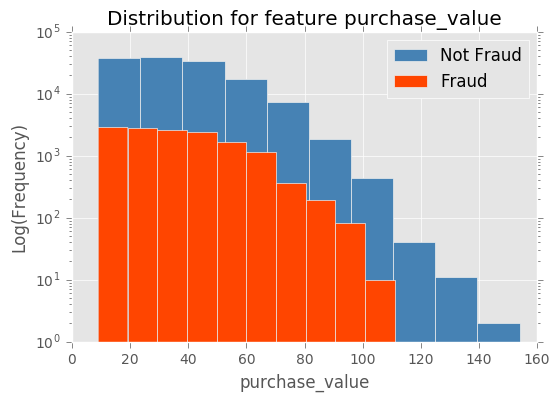

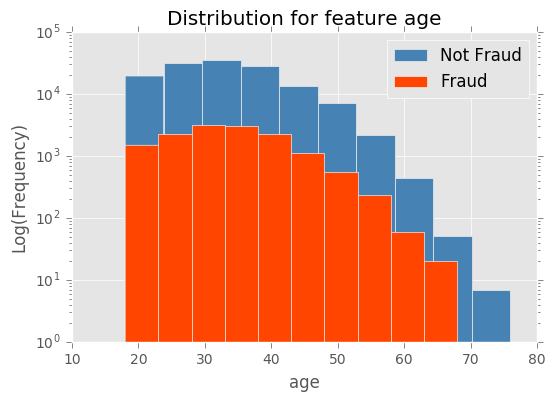

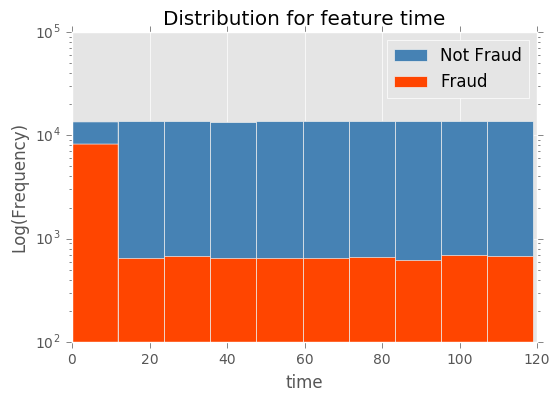

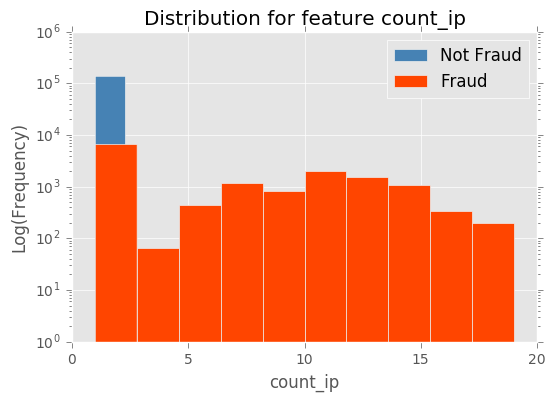

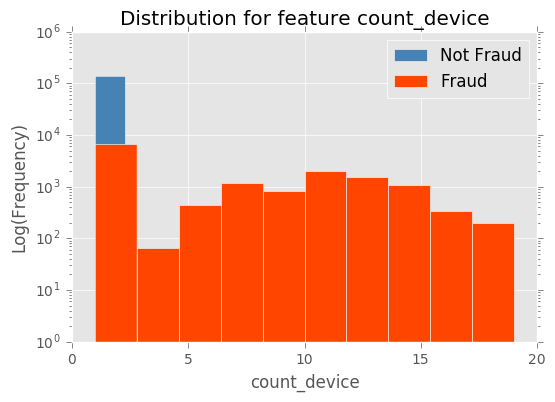

In [27]:
# apply log transformation to y axis
feature_his(merged_data, numeric_cols, is_transform = True)

#### Insight
* Purchase value has similar distribution for fraud and non-fraud population, but there are less fraud for purchase value is greater than 110.
* Age has similar distribution for fraud and non-fraud population, but there are less fraud for age is greater than 70.
* The fraud purchase tend to spend less time between signed up and purchase.
* The fraud purchase tend to use the same IP address and the same device to make multiple purchases at the same time.

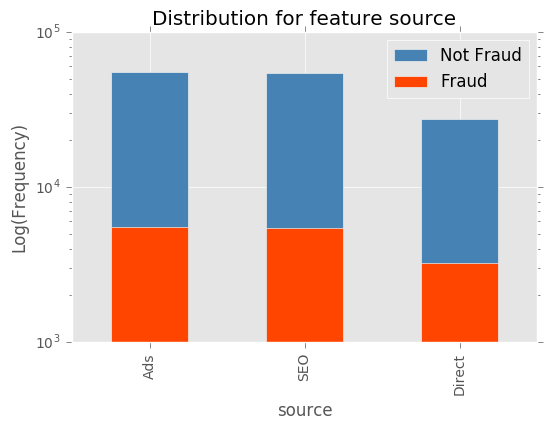

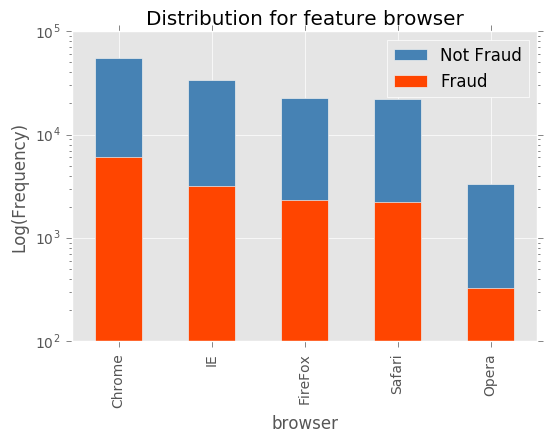

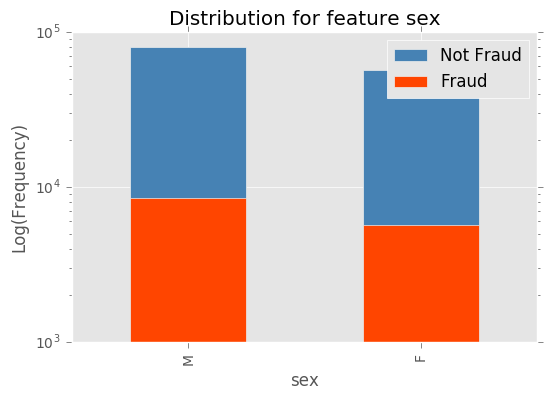

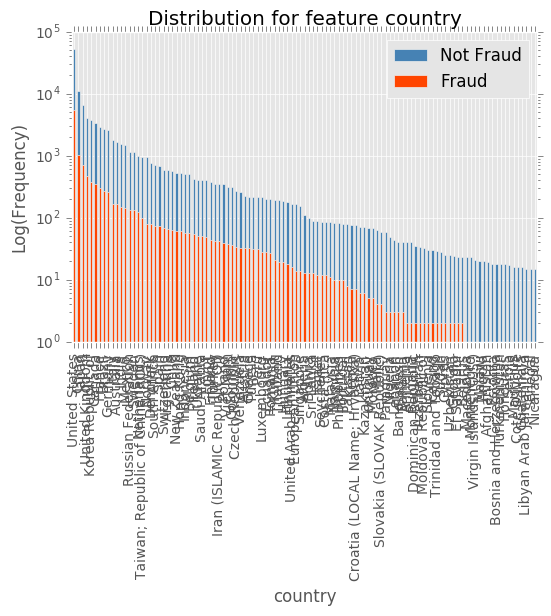

In [28]:
# examine the category values
category_cols = ['source', 'browser', 'sex', 'country']
feature_his(merged_data, category_cols, is_transform = True, is_category = True)

#### Insight
* The distribution of fraud and non-fraud population is not significant difference across source, browser and sex.
* Some contries have significant lower fraud.

#### 3.2 Examin the fraud rate
To better understand the fraud, the fraud rate is analyzed.

In [29]:
def rate_plot(df, cols):
    '''
    function to generate fraud rate plots
    '''
    for col in cols:
        ax,fig = plt.subplots()
        d = df[df['class'] == 1][col].value_counts()/df[col].value_counts()
        print 'The 20 highest fraud rate across: %s'%col
        print d.sort_values(ascending = False)[:20]
        d.plot(kind = 'bar')
        plt.ylabel("Fraud Rate")
        plt.xlabel(col)
        plt.title('Fraud Rate in Different %s'%col)

The 20 highest fraud rate across: purchase_value
100    0.301887
88     0.257310
92     0.226562
104    0.176471
91     0.142857
69     0.139623
86     0.130653
62     0.130571
59     0.127645
81     0.126582
111    0.125000
60     0.122419
65     0.121182
32     0.118147
19     0.117451
64     0.114068
52     0.113095
84     0.112903
17     0.112340
42     0.108521
Name: purchase_value, dtype: float64
The 20 highest fraud rate across: age
63    0.285714
61    0.173913
58    0.134529
36    0.117791
50    0.113065
54    0.109589
53    0.109118
32    0.107861
23    0.106754
42    0.106494
40    0.104872
55    0.103960
56    0.102941
48    0.101885
39    0.100279
68    0.100000
52    0.099034
33    0.098675
18    0.097755
28    0.097231
Name: age, dtype: float64
The 20 highest fraud rate across: time
0      0.873259
102    0.058673
106    0.058475
34     0.057899
83     0.056765
3      0.056401
118    0.055648
36     0.055603
103    0.055465
99     0.054681
116    0.054576
35     0.053030

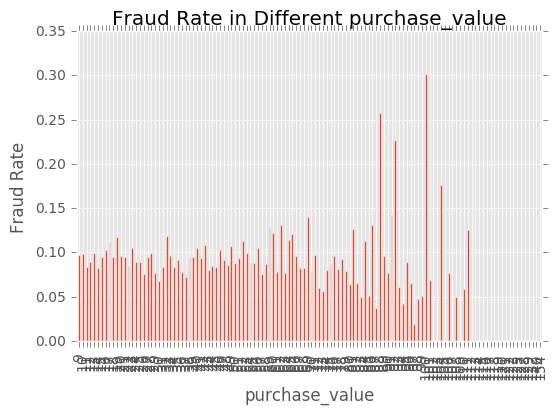

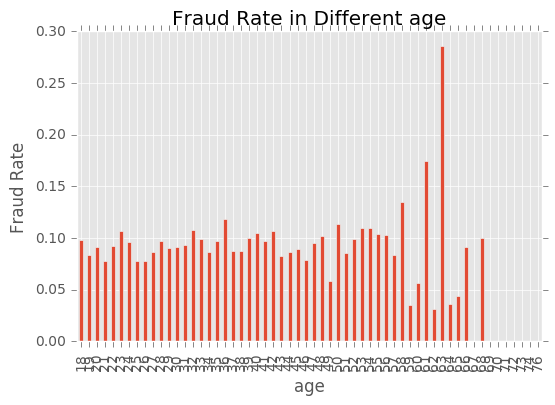

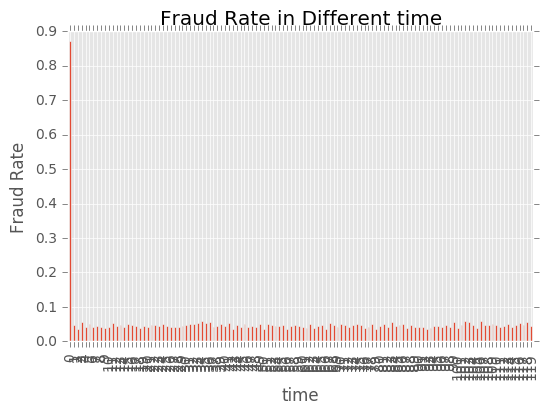

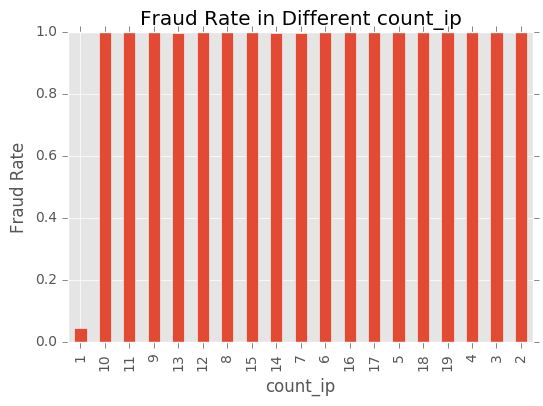

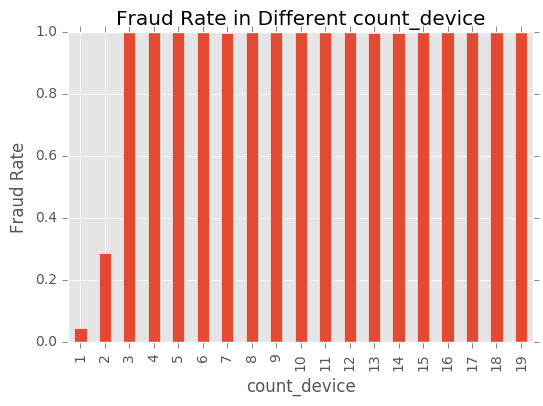

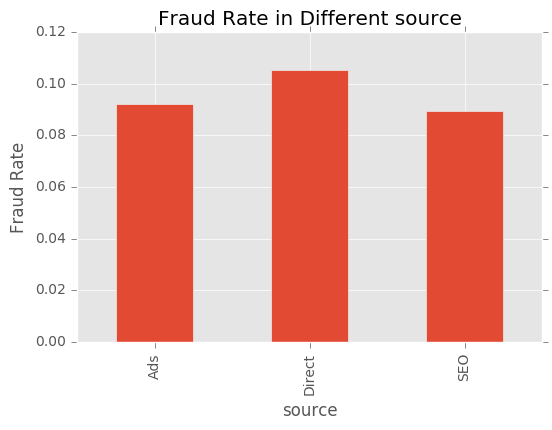

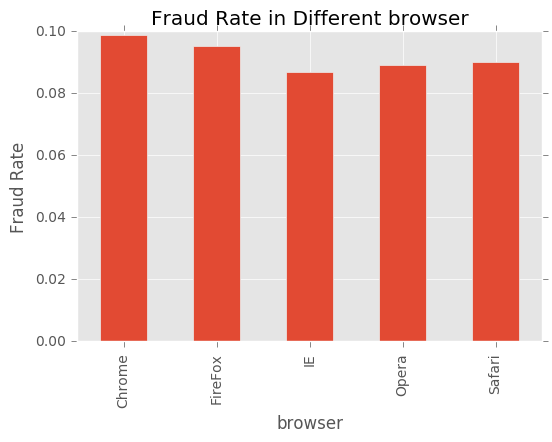

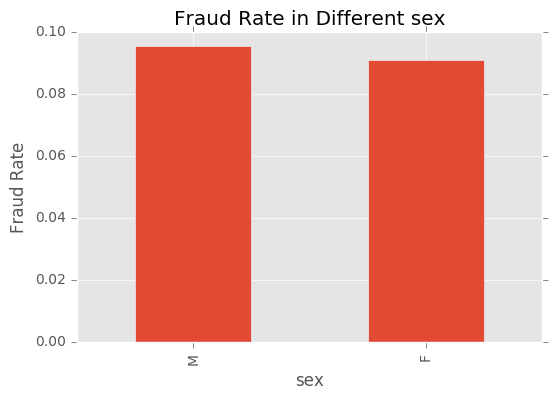

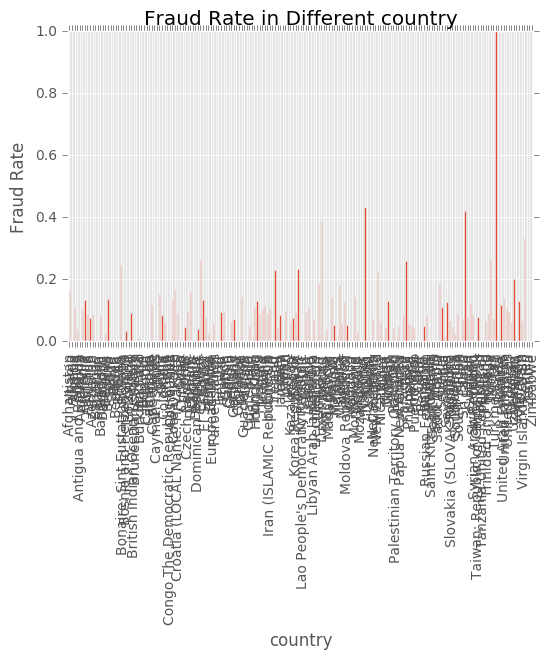

In [30]:
cols = numeric_cols + category_cols
rate_plot(merged_data, cols)

#### Insight
* The top 3 fraud rate across purchase value: 100, 88 and 92.
* The top 3 fraud rate across age: 63, 61 and 58.
* Signed up and purchased on the same day usually have significant high fraud rate.
* Used the same IP address to make 2 or more times of purchase on the same time are usually fraud.
* Used the same device to make 3 or more times of purchase on the same time are usually fraud.
* There are no obvious differences for fraud rate across source, browser and sex.
* The top 5 fraud rate across country: Turkmenistan, Namibia, Sri Lanka, Luxembourg, Virgin Islands (U.S.)

#### 3.3 Examine feature correlation

In [31]:
import seaborn as sns

def corr_map(df):
    '''
    function to generate the correlation heatmap
    '''
    correlation = df[:].corr()
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        matplotlib.rcParams.update({'font.size': 10})
        sns.heatmap(correlation, cmap = 'coolwarm', annot = True, mask = mask)

##### 3.3.1 Feature-feature correlation heatmap based on categorical feature transformation

In [32]:
df1 = merged_data
# map sex
mapp_sex = {'F' : 0, 'M': 1}
df1['sex'] = df1['sex'].apply(lambda x: mapp_sex[x])

# map source
mapp_source = {'Ads' : 0, 'Direct': 1, 'SEO': 2}
df1['source'] = df1['source'].apply(lambda x: mapp_source[x])

# map browser
mapp_b = {'Chrome' : 0, 'FireFox': 1, 'IE': 2, 'Opera': 3, 'Safari': 4}
df1['browser'] = df1['browser'].apply(lambda x: mapp_b[x])

# map country
df1['country'].fillna('None', inplace = True)
country = list(set(mapping_dict.values()))
mapp_c = dict(zip(country, range(len(country))))
mapp_c['None'] = len(country)
df1['country'] = df1['country'].apply(lambda x: mapp_c[x])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 10 columns):
purchase_value    151112 non-null int64
source            151112 non-null int64
browser           151112 non-null int64
sex               151112 non-null int64
age               151112 non-null int64
class             151112 non-null int64
country           151112 non-null int64
time              151112 non-null int32
count_ip          151112 non-null int64
count_device      151112 non-null int64
dtypes: int32(1), int64(9)
memory usage: 12.1 MB


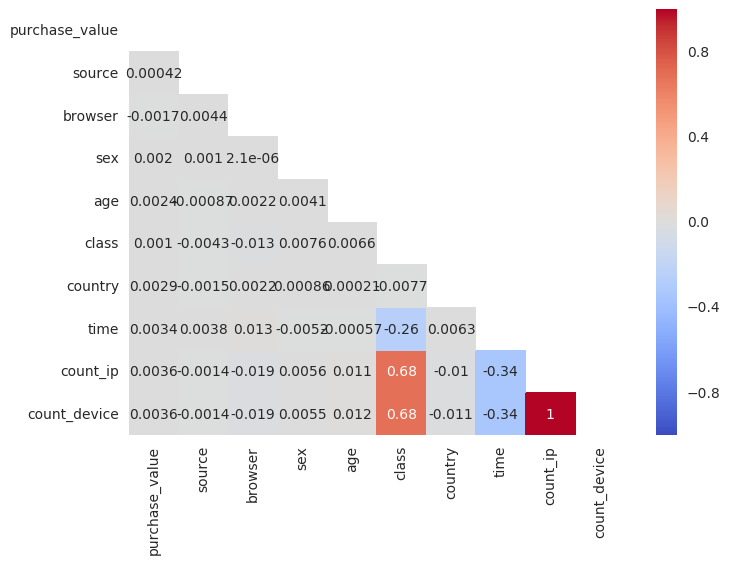

In [33]:
corr_map(df1)

#### Insight
* The class is positively correlated with count_ip, count_device. Purchase from the same IP address and using the same device at the for multiple purchases on the same time are more likely frauds.
* The class is negatively correlated with time between signed up and purchase. Short time periods are more likely frauds.

##### 3.3.2 Feature-feature correlation heatmap based on fraud rate

In [34]:
def compute_fraud_rate (df, cols):
    '''
    function to compute the fraud rate
    '''
    for col in cols:
        d = (df[df['class'] == 1][col].value_counts()/df[col].value_counts()).reset_index()
        d.columns = [col, col + '_fraud_rate']
        df = pd.merge(df, d, on = [col], how = 'left')
        df.drop(col, axis = 1, inplace = True)
        df.fillna(0, inplace = True)
    return df

In [35]:
df2 = merged_data        
df2 = compute_fraud_rate(df2, cols)
print merged_data.shape
df2.info(), df2.head(), df2.shape

(151112, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 10 columns):
class                        151112 non-null int64
purchase_value_fraud_rate    151112 non-null float64
age_fraud_rate               151112 non-null float64
time_fraud_rate              151112 non-null float64
count_ip_fraud_rate          151112 non-null float64
count_device_fraud_rate      151112 non-null float64
source_fraud_rate            151112 non-null float64
browser_fraud_rate           151112 non-null float64
sex_fraud_rate               151112 non-null float64
country_fraud_rate           151112 non-null float64
dtypes: float64(9), int64(1)
memory usage: 12.7 MB


(None,    class  purchase_value_fraud_rate  age_fraud_rate  time_fraud_rate  \
 0      0                   0.083469        0.100279         0.047428   
 1      0                   0.102498        0.109118         0.873259   
 2      1                   0.095306        0.109118         0.873259   
 3      1                   0.095306        0.109118         0.873259   
 4      1                   0.095306        0.109118         0.873259   
 
    count_ip_fraud_rate  count_device_fraud_rate  source_fraud_rate  \
 0             0.045643                 0.045512           0.089285   
 1             0.045643                 0.045512           0.092066   
 2             1.000000                 1.000000           0.089285   
 3             1.000000                 1.000000           0.089285   
 4             1.000000                 1.000000           0.089285   
 
    browser_fraud_rate  sex_fraud_rate  country_fraud_rate  
 0            0.098792        0.095523            0.097865  
 1  

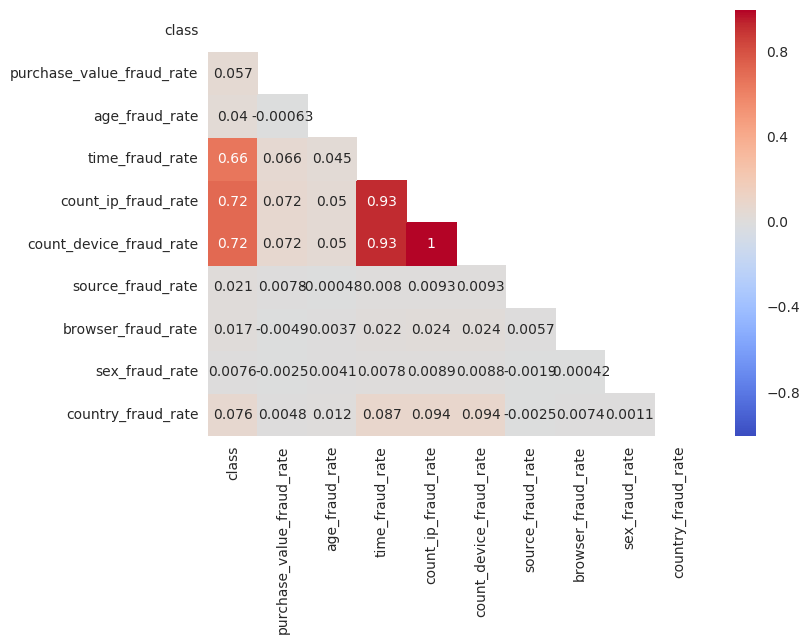

In [36]:
corr_map(df2)

#### Insight
* The class is positively correlated with count_ip_fraud_rate, count_device_fraud_rate and time_fraud_rate.

<a id='machine_learning'></a>
### 4. Machine Learning Model to Predict Fraud

#### 4.1 Split training and test data set

##### 4.1.1 Treat data as category values

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(merged_data, test_size = 0.2, random_state = 42)

In [38]:
# split train and test data
X_train_cat = train[cols].values
X_test_cat = test[cols].values
y_train_cat = train['class'].values
y_test_cat = test['class'].values

# examine the data shape in train and test data
print 'Train data (category): ', X_train_cat.shape
print 'Test data (category): ', X_test_cat.shape

Train data (category):  (120889, 9)
Test data (category):  (30223, 9)


##### 4.1.2 Treat data as continous values using fraud rate

In [39]:
train_val = compute_fraud_rate (train, cols)
test_val = compute_fraud_rate (test, cols)
# split train and test data
X_train_val = train_val[train_val.columns[1:10]].values
X_test_val = test_val[train_val.columns[1:10]].values
y_train_val = train_val['class'].values
y_test_val = test_val['class'].values
# examine the data shape in train and test data
print 'Train data (contious): ', X_train_val.shape
print 'Test data (contious): ', X_test_val.shape

Train data (contious):  (120889, 9)
Test data (contious):  (30223, 9)


#### 4.2 Use ensemble to down sampling and balance classes

In [40]:
from collections import Counter
from imblearn.ensemble import EasyEnsemble

print 'Original dataset shape {}'.format(Counter(y_train_cat))
ee_count_cat = EasyEnsemble (random_state = 42)
ee_count_val = EasyEnsemble (random_state = 42)
X_train_cat_res, y_train_cat_res = ee_count_cat.fit_sample(X_train_cat, y_train_cat)
X_train_cat_res, y_train_cat_res = X_train_cat_res[0], y_train_cat_res[0]

X_train_val_res, y_train_val_res = ee_count_val.fit_sample(X_train_val, y_train_val)
X_train_val_res, y_train_val_res = X_train_val_res[0], y_train_val_res[0]
print 'Resampled dataset shape (category) {}'.format(Counter(y_train_cat_res))
print 'Resampled dataset shape (continous) {}'.format(Counter(y_train_val_res))

/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Original dataset shape Counter({0: 109567, 1: 11322})
Resampled dataset shape (category) Counter({0: 11322, 1: 11322})
Resampled dataset shape (continous) Counter({0: 11322, 1: 11322})


In [41]:
def plot_learning_curve(title, labels, colors, train_sizes_list, 
                        train_scores_list, test_scores_list, is_two_plots = False):
    '''
    this method plots training and cross-validation learning curves
    '''
    # define a figure layout and labels
    plt.figure(figsize = (10,8))
    plt.title(title)
    plt.xlabel('Training sample size')
    plt.ylabel('Recall Score')
    plt.grid()  
    plt.ylim([0.5, 1.0])
    matplotlib.rcParams.update({'font.size': 20})
    # use length = 2 to plot 4 lines
    length = 2
    # used length = 1 to plot 2 lines
    if is_two_plots:
        length = 1
    for i in range(length):      
        line_label = labels[i]
        line_color = colors[i]
        train_sizes, train_scores, test_scores = train_sizes_list[i], \
                                                 train_scores_list[i], test_scores_list[i]
        # compute the mean score and standard deviation
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        # plot train curve
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color=line_color[0])
        plt.plot(train_sizes, train_scores_mean, 'o-', color=line_color[0],
                 label=line_label[0], linewidth = 5)
        # plot cross-validation curve
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color=line_color[1])
        plt.plot(train_sizes, test_scores_mean, '^--', color=line_color[1],
                 label=line_label[1], linewidth = 5)
        plt.legend(bbox_to_anchor=(0., 1.1, 1., .105),loc=3, mode='expand',
                   borderaxespad=0.)
    return plt

In [42]:
def model_selection(clf, X_train, y_train, title, labels, colors, score, is_two_plots = True):
    '''
    learning and cross-validation curves for different models
    '''
    train_sizes_list = []
    train_scores_list = []
    test_scores_list = []
    cv = ShuffleSplit(n_splits = 5,test_size=0.2, random_state=42)
    train_sizes=np.linspace(.1, 1.0, 10)
    # get data trained with clf
    train_sizes, train_scores, test_scores = learning_curve(
                clf, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring = score)
    train_sizes_list.append(train_sizes)
    train_scores_list.append(train_scores)
    test_scores_list.append(test_scores)
    # generated learning curves to measure the performance of clf
    if is_two_plots:
        plot_learning_curve(title, labels, colors, train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = is_two_plots)
    return train_sizes_list, train_scores_list, test_scores_list

#### 4.3 RandomForest default model for categorical data
First, a default RandomForest model is trained.

([array([ 1811,  3623,  5434,  7246,  9057, 10869, 12680, 14492, 16303, 18115])],
 [array([[ 0.98049052,  0.97981149,  0.98512911,  0.9805492 ,  0.98014999],
         [ 0.97584385,  0.98202125,  0.98237837,  0.9799397 ,  0.97732708],
         [ 0.98159783,  0.98032835,  0.97939634,  0.97592095,  0.9810517 ],
         [ 0.98045091,  0.98147602,  0.97786311,  0.978327  ,  0.98223855],
         [ 0.98010152,  0.97965973,  0.97904287,  0.97872236,  0.9817763 ],
         [ 0.97823514,  0.98058418,  0.97851694,  0.97995435,  0.98094667],
         [ 0.98028978,  0.98191873,  0.97711605,  0.97686488,  0.98159899],
         [ 0.98001027,  0.97846264,  0.97764421,  0.98064693,  0.9805151 ],
         [ 0.98015049,  0.98030208,  0.97824764,  0.97954   ,  0.98273044],
         [ 0.9799121 ,  0.97922609,  0.9782453 ,  0.98058269,  0.97971393]])],
 [array([[ 0.7430853 ,  0.7415122 ,  0.73734657,  0.73474091,  0.73942515],
         [ 0.74513458,  0.74039619,  0.7418428 ,  0.73935697,  0.74971489],
   

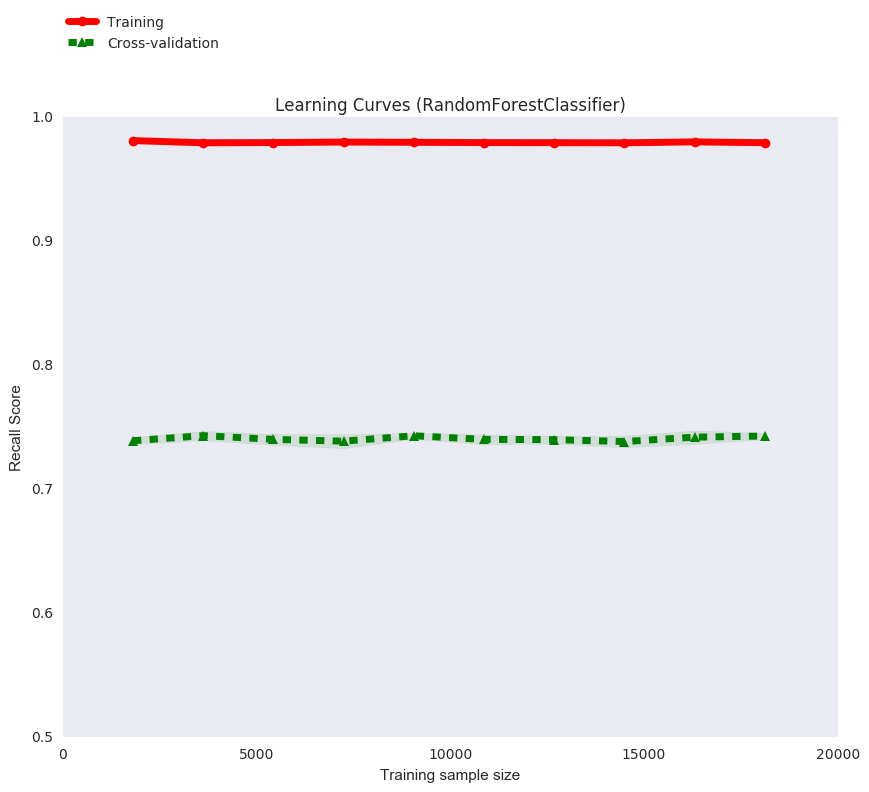

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import learning_curve

# set up a RandomForestClassifier classifier
rf_clf = RandomForestClassifier(random_state=42)
title = 'Learning Curves (RandomForestClassifier)'
# set colors: r -red, g- green, b - blue, m - magenta
colors = [('r', 'g')] 
labels1 = [('Training', 'Cross-validation')]
score = 'recall_macro'
# curves for RandomForestClassifier
model_selection(rf_clf, X_train_cat_res, y_train_cat_res, title, labels1, colors, score)

The model showed overfitting issue. Then, the model is optimized with different parameters

#### 4.4 RandomForest optimization

In [44]:
from sklearn.model_selection import GridSearchCV
def search_best_params(X, y, clf, params):
    '''
    this method searchs the best parameters for a classifier
    '''
    model = GridSearchCV(clf, params, cv = 5, n_jobs =1, scoring = 'recall_macro')
    model.fit(X, y)
    best_parameter = model.best_params_
    return best_parameter

In [45]:
# setup RandomForestClassifier classifiers
rf_clf = RandomForestClassifier(random_state=42)
# setup parameters for searching
rf_parameters = {'n_estimators' : [10, 50, 100, 200],
                     'criterion' : ['gini', 'entropy'],
                    'min_impurity_split': np.logspace(-8, -3, 5)} 
# search best parameters
rf_best_params = search_best_params(X_train_cat_res, y_train_cat_res,rf_clf,
                                      rf_parameters)
print 'Best parameters for RandomForestClassifier: ', rf_best_params

Best parameters for RandomForestClassifier:  {'n_estimators': 200, 'min_impurity_split': 1e-08, 'criterion': 'gini'}


([array([ 1811,  3623,  5434,  7246,  9057, 10869, 12680, 14492, 16303, 18115])],
 [array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.9997233 ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.99981385,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.99986002,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.99989076,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.99981597,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.99984429,  1.        ,  1.        ,  0.99992137],
         [ 1.        ,  0.99986335,  1.        ,  1.        ,  0.99993116],
         [ 1.        ,  0.99987732,  0.99993854,  1.        ,  0.99993854],
         [ 1.        ,  0.99988981,  0.99994449,  1.        ,  0.99994488]])],
 [array([[ 0.74200327,  0.74908535,  0.75379394,  0.74513012,  0.75575532],
         [ 0.75448394,  0.75494661,  0.75473747,  0.74538413,  0.75599061],
   

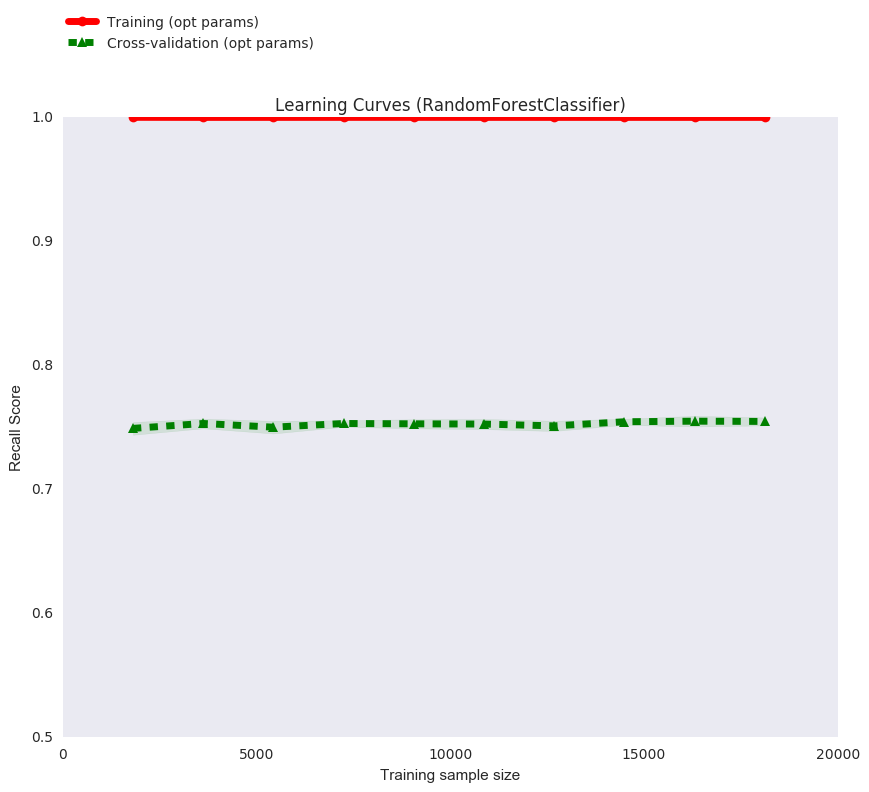

In [46]:
# define the RandomForestClassifier with best parameters
rf_clf_best = RandomForestClassifier(random_state=42,**rf_best_params)
# set labels for graph
labels2 = [
          ('Training (opt params)', 
           'Cross-validation (opt params)')]
# learning and cross-validation curves for optimized RandomForestClassifier
model_selection(rf_clf_best, X_train_cat_res, y_train_cat_res, title, labels2, colors, score)

The overfitting issue is not solved with parameter optimization.

#### 4.5 RandomForest default and optimization comparisons

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


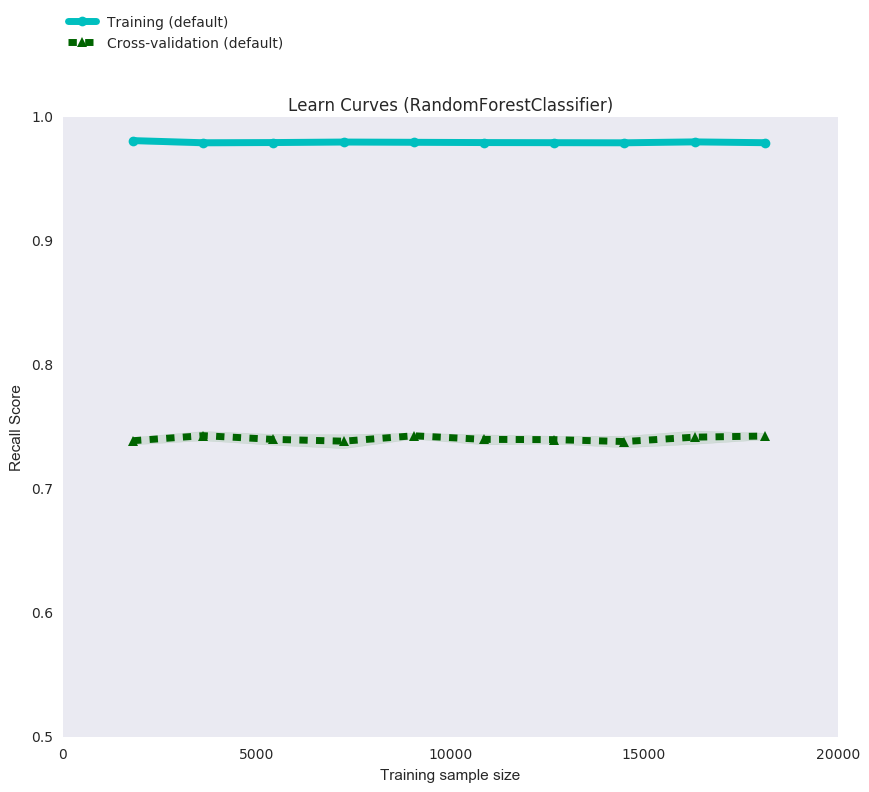

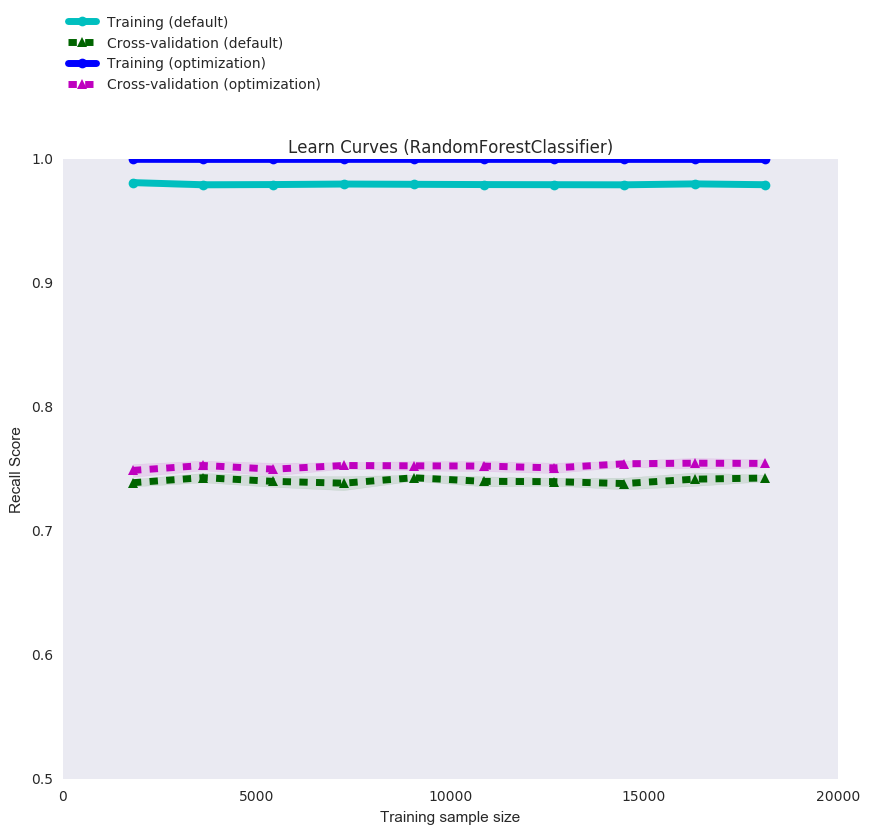

In [47]:
title = 'Learn Curves (RandomForestClassifier)'
labels3 = [('Training (default)', 
           'Cross-validation (default)')]
labels4 = labels3 + [('Training (optimization)', 
           'Cross-validation (optimization)')]

# Learning curves with default parameters
train_sizes_list, train_scores_list, test_scores_list = model_selection(rf_clf, X_train_cat_res, y_train_cat_res, 
                                                        title, labels2, colors, score, is_two_plots = False)
print plot_learning_curve(title, labels3, [('c','darkgreen')], train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = True)
# Learning curves with default or optimizated parameters
train_sizes_list_1, train_scores_list_1, test_scores_list_1 = model_selection(rf_clf_best, X_train_cat_res, y_train_cat_res, 
                                                            title, labels2, colors, score, is_two_plots = False)
train_sizes_list += train_sizes_list_1
train_scores_list += train_scores_list_1
test_scores_list  += test_scores_list_1
print plot_learning_curve(title, labels4, [('c','darkgreen'), ['b', 'm']], train_sizes_list, train_scores_list, 
                          test_scores_list)

The performance of the optimized Random forest model is slightly improved as compared the cross-validation curves.

#### 4.6 LogisticRegression (default model) - for continous fraud rate values
The second model implemented is LogisticRegression.

([array([ 1811,  3623,  5434,  7246,  9057, 10869, 12680, 14492, 16303, 18115])],
 [array([[ 0.77369008,  0.77317339,  0.77202643,  0.75      ,  0.77309008],
         [ 0.7725    ,  0.7678596 ,  0.77043673,  0.75935702,  0.77815126],
         [ 0.77585579,  0.767645  ,  0.77225901,  0.76205111,  0.77832965],
         [ 0.77397922,  0.76986547,  0.77239214,  0.76529008,  0.77657508],
         [ 0.77137633,  0.76960655,  0.77066521,  0.76632899,  0.77424343],
         [ 0.77061453,  0.76930407,  0.77216107,  0.76945553,  0.77420839],
         [ 0.76978861,  0.76946026,  0.77134051,  0.77302847,  0.77417833],
         [ 0.76923046,  0.76823995,  0.77166346,  0.77312881,  0.77268346],
         [ 0.76982225,  0.76852979,  0.77144835,  0.77229637,  0.77135882],
         [ 0.77003599,  0.76986183,  0.77106818,  0.77178007,  0.77102806]])],
 [array([[ 0.77337828,  0.77392078,  0.7699784 ,  0.76655128,  0.76899156],
         [ 0.77425699,  0.77198296,  0.7699784 ,  0.76655128,  0.77010218],
   

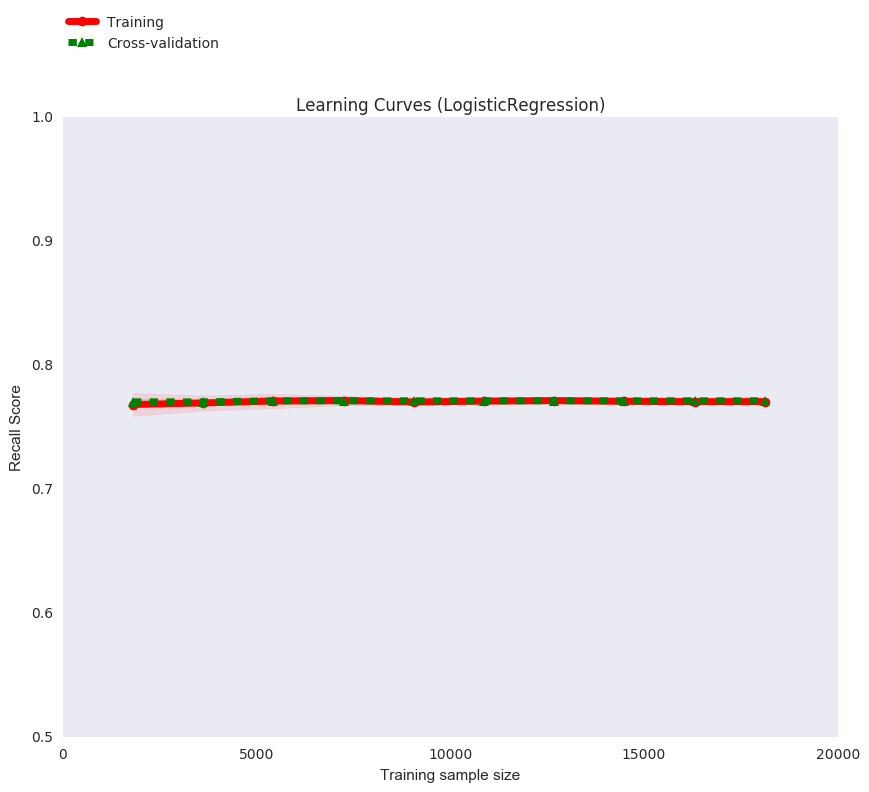

In [48]:
from sklearn.linear_model import LogisticRegression

# set up a LogisticRegression classifier
lr_clf = LogisticRegression(random_state = 42)

title = 'Learning Curves (LogisticRegression)'
# set colors: r -red, g- green
colors = [('r', 'g')] 
labels1 = [('Training', 'Cross-validation')]
        
model_selection(lr_clf, X_train_val_res, y_train_val_res, title, labels1, colors, score)

This default logistic regression model is highly biased.

#### 4.7 LogisticRegression optimization

In [49]:
# setup LogisticRegression
lr_clf = LogisticRegression(random_state = 42)
# setup parameters for searching
lr_parameters = {'tol' : np.logspace(-8, -3, 5),
                     'C' : np.logspace(-3, 3, 6),
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
                    'max_iter': [100, 500, 1000, 2000]}
# search best parameters
lr_best_params = search_best_params(X_train_val_res, y_train_val_res,lr_clf,
                                      lr_parameters)
print 'Best parameters for LogisticRegression: ', lr_best_params

/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best parameters for LogisticRegression:  {'C': 0.25118864315095796, 'max_iter': 100, 'tol': 1e-08, 'solver': 'newton-cg'}


([array([ 1811,  3623,  5434,  7246,  9057, 10869, 12680, 14492, 16303, 18115])],
 [array([[ 0.77154336,  0.77093626,  0.76593562,  0.74798092,  0.77309008],
         [ 0.76922624,  0.76730483,  0.76664171,  0.75782476,  0.77815126],
         [ 0.77248793,  0.76558895,  0.7691286 ,  0.75950292,  0.7781457 ],
         [ 0.77302542,  0.76679373,  0.77157291,  0.76486937,  0.7764363 ],
         [ 0.77071784,  0.76938807,  0.77055616,  0.76565836,  0.77391208],
         [ 0.7705227 ,  0.76787781,  0.77206968,  0.76926816,  0.7740243 ],
         [ 0.76970977,  0.76946026,  0.77134051,  0.77278905,  0.77417833],
         [ 0.76916154,  0.76823995,  0.77166346,  0.77305915,  0.77268346],
         [ 0.76976079,  0.76859151,  0.77144835,  0.77223453,  0.77142004],
         [ 0.76998065,  0.76986183,  0.77106818,  0.77178007,  0.77108334]])],
 [array([[ 0.77045946,  0.7713154 ,  0.76544198,  0.76531527,  0.76899156],
         [ 0.77045946,  0.7713154 ,  0.76544198,  0.76531527,  0.76899156],
   

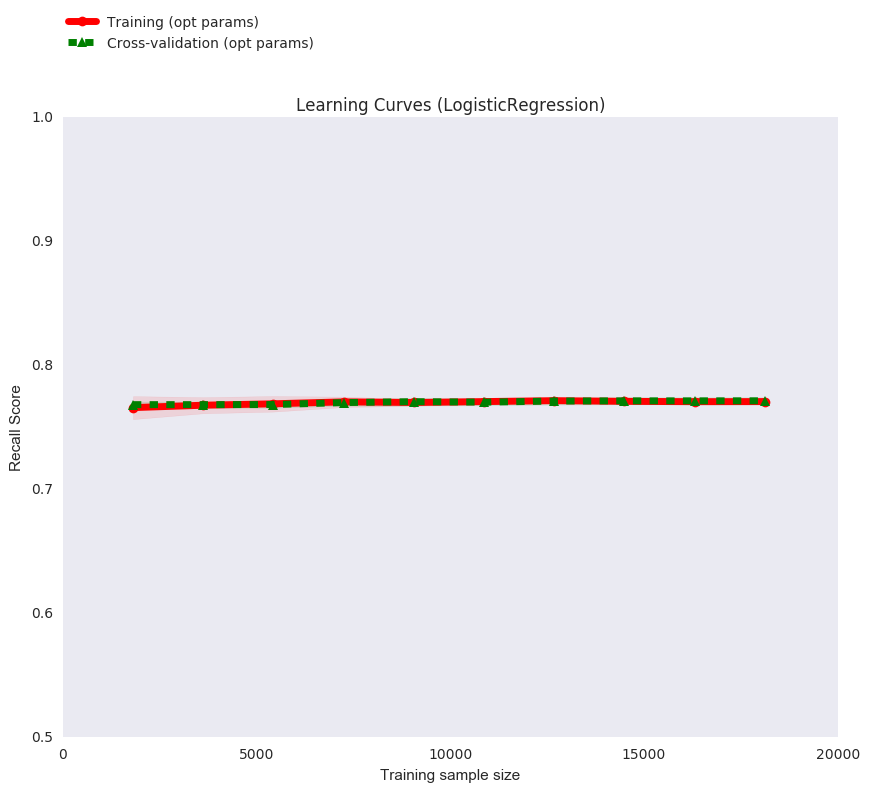

In [50]:
# define the LogisticRegression with best parameters
lr_clf_best = LogisticRegression(random_state = 42, **lr_best_params)
# set labels for graph
labels2 = [
          ('Training (opt params)', 
           'Cross-validation (opt params)')]

model_selection(lr_clf_best, X_train_val_res, y_train_val_res, title, labels2, colors, score)

This opt logistic regression model is still highly biased.

#### 4.8 Compare LogisticRegression classifier with and without optimization

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


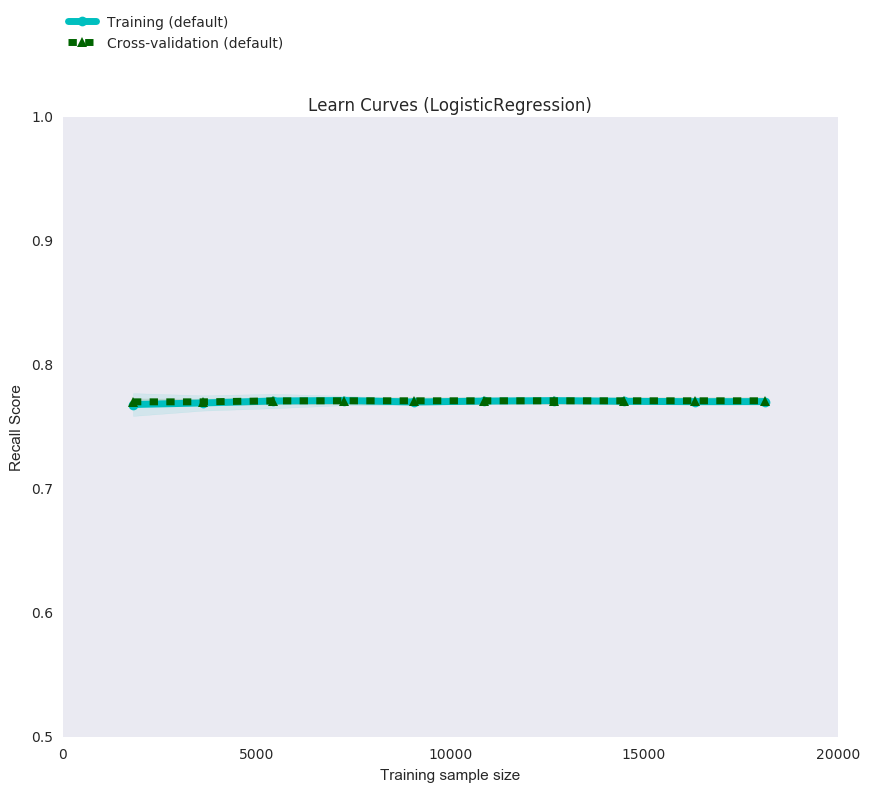

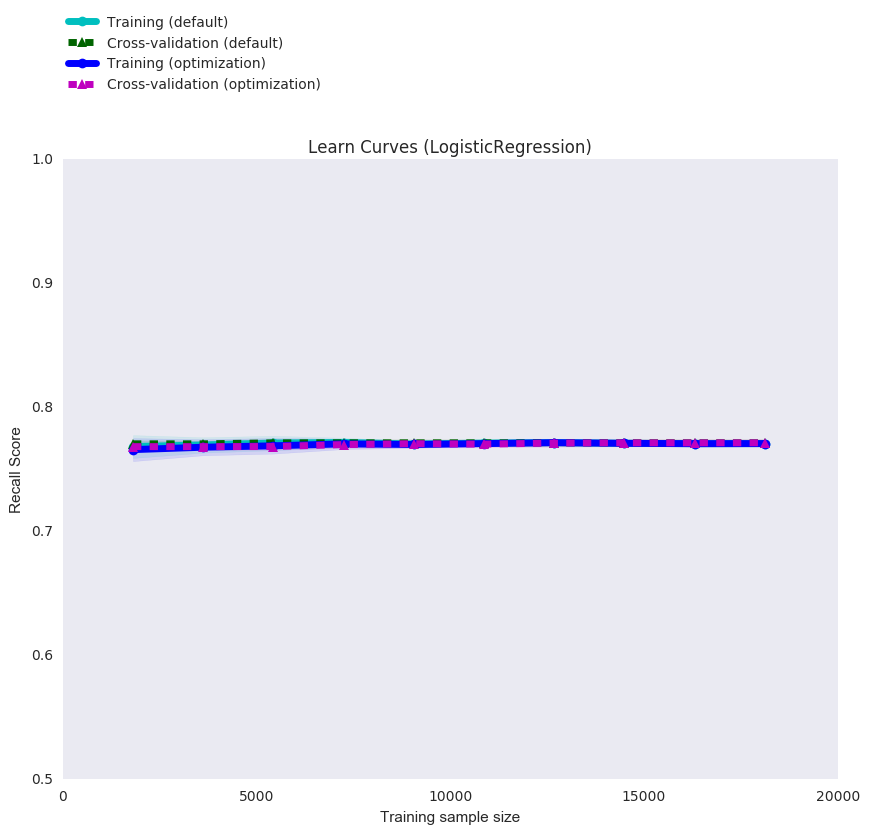

In [51]:
title = 'Learn Curves (LogisticRegression)'
labels3 = [('Training (default)', 
           'Cross-validation (default)')]
labels4 = labels3 + [('Training (optimization)', 
           'Cross-validation (optimization)')]

# Learning curves with default parameters
train_sizes_list, train_scores_list, test_scores_list = model_selection(lr_clf, X_train_val_res, y_train_val_res, 
                                                        title, labels2, colors, score, is_two_plots = False)
print plot_learning_curve(title, labels3, [('c','darkgreen')], train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = True)
# Learning curves with default or optimizated parameters
train_sizes_list_1, train_scores_list_1, test_scores_list_1 = model_selection(lr_clf_best, X_train_val_res, y_train_val_res, 
                                                            title, labels2, colors, score, is_two_plots = False)
train_sizes_list += train_sizes_list_1
train_scores_list += train_scores_list_1
test_scores_list  += test_scores_list_1
print plot_learning_curve(title, labels4, [('c','darkgreen'), ['b', 'm']], train_sizes_list, train_scores_list, 
                          test_scores_list)

The model does not show significant improvement with and without optimization.

#### 4.9 Final comparisons based on test data set

In [52]:
def model_compare(models, X_train, y_train, X_test):
    '''
    function to compare different models based on test dataset
    '''
    times = []
    preds = []
    for model in models:
        t1 = time.time()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        t2 = time.time()
        times.append(t2 - t1)
        preds.append(pred)
    return times, preds

                          accu_score   f1_score  precision  recall_score  \
RandomForest \n(default)   85.914701  43.548601  65.097152     73.417439   
RandomForest \n(opt)       89.504682  50.452983  70.322382     74.969880   
Logistic \n(default)       95.510042  68.739922  97.010248     76.333238   
Logistic \n(opt)           95.549747  68.829664  97.627904     76.244198   

                              time  
RandomForest \n(default)  0.363330  
RandomForest \n(opt)      6.964682  
Logistic \n(default)      0.054504  
Logistic \n(opt)          0.087970  


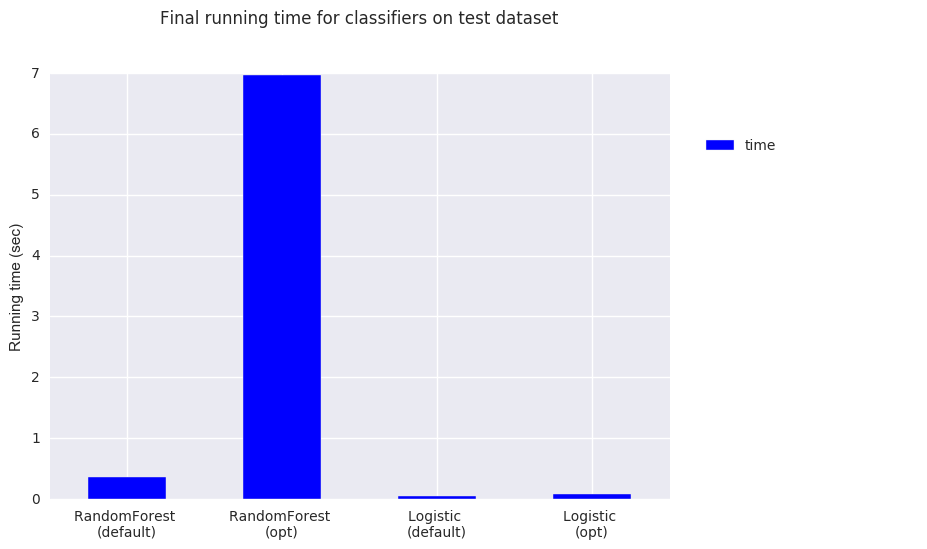

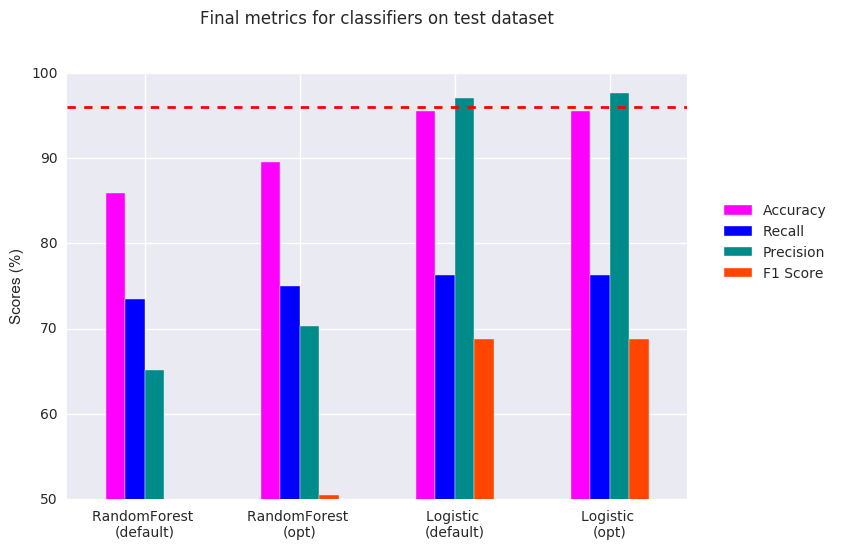

In [53]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report
import time

# set up RandomForest classifiers
rf_clf = RandomForestClassifier(random_state=42)
rf_clf_best = RandomForestClassifier(random_state=42,**rf_best_params)
# set up LogisticRegression classifiers
lr_clf = LogisticRegression(random_state = 42)
lr_clf_best = LogisticRegression(random_state = 42, **lr_best_params)

rf_models = [rf_clf, rf_clf_best]
lr_models = [lr_clf, lr_clf_best]

times, preds = model_compare(rf_models, X_train_cat_res, y_train_cat_res, X_test_cat)
times_lr, preds_lr = model_compare(lr_models, X_train_val_res, y_train_val_res, X_test_val)
times += times_lr
preds += preds_lr

# print out final comparison results
models_names = ['RandomForest \n(default)', 
        'RandomForest \n(opt)', 
        'Logistic \n(default)', 
        'Logistic \n(opt)']
# compute metrics
accuracy_scores = [accuracy_score(y_test_cat, pred)*100 for pred in preds]
recall_scores = [recall_score(y_test_cat, pred, average = 'macro')*100 for pred in preds]
precision_scores = [precision_score(y_test_cat, pred, average = 'macro')*100 for pred in preds]
f1_scores = [f1_score(y_test_cat, pred)*100 for pred in preds]
# put data into pandas dataframe
df = pd.DataFrame({'time':times, 'accu_score': accuracy_scores, 'recall_score': recall_scores, 
                   'precision': precision_scores, 'f1_score': f1_scores})
df.index = models_names
# print the data
print df
# plot the time graph
plt.Figure(figsize = (15,8))
df[['time']].plot(kind = 'bar', color = ['b'], rot = 0)
plt.legend(['time'], bbox_to_anchor=(1.05, .8, 0.35, 0),loc=3, mode="expand",
                   borderaxespad=0.)
plt.ylabel('Running time (sec)')
plt.title('Final running time for classifiers on test dataset', y = 1.1)
# plot the final metrics graph
plt.Figure(figsize = (15,8))
df_1 = df[['accu_score', 'recall_score', 'precision', 'f1_score']]
df_1.plot(kind = 'bar', color = ['magenta', 'blue', 'darkcyan', 'orangered'], rot = 0)
plt.ylim([50, 100])
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1 Score'], bbox_to_anchor=(1.05, 0.5, 0.75, 0),loc=3,
                   borderaxespad=0.)
plt.axhline(y = 96., color = 'red', linestyle='dashed', linewidth=2)
plt.ylabel('Scores (%)')
plt.title('Final metrics for classifiers on test dataset', y = 1.1)

The model with best performance based on recall is the LogisticRegression. Then, the confusion matrix and ROC curves for this model is explored to better understand the perfoemance of the model

Confusion matrix, without normalization
[[27393     1]
 [ 1344  1485]]
Normalized confusion matrix
[[ 1.    0.01]
 [ 0.48  0.53]]


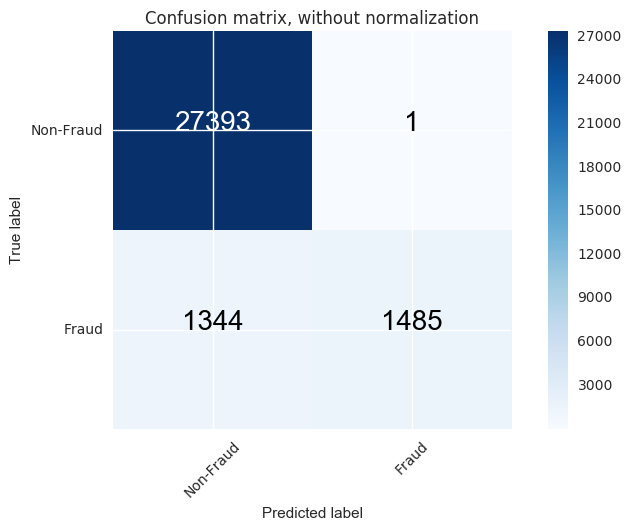

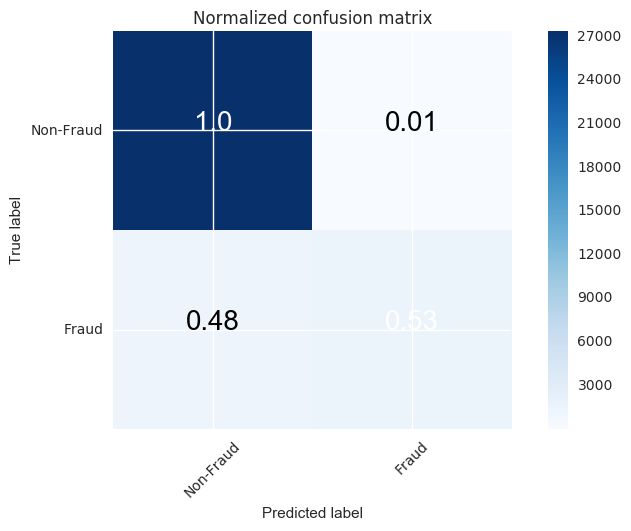

             precision    recall  f1-score   support

          0       0.95      1.00      0.98     27394
          1       1.00      0.52      0.69      2829

avg / total       0.96      0.96      0.95     30223



In [54]:
from sklearn.metrics import confusion_matrix
import itertools
import math
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        for i in range(2):
            cm[i] = [math.ceil(j*100)/100 for j in cm[i]]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_val, preds[3])
np.set_printoptions(precision=2)
class_names = ['Non-Fraud', 'Fraud']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print classification_report(y_test_val, preds[3])

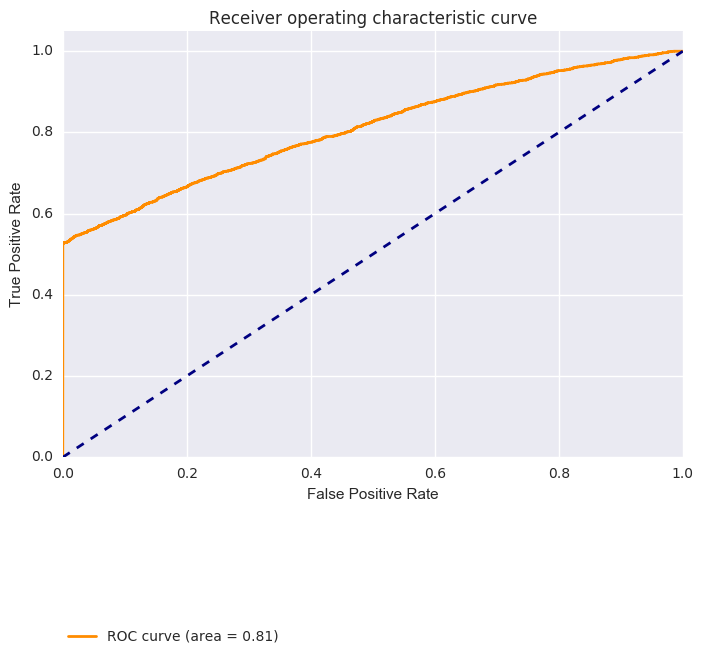

In [55]:
from sklearn.metrics import roc_curve, auc
lr_clf_best = LogisticRegression(random_state=42,**lr_best_params)

y_score = lr_clf_best.fit(X_train_val_res, y_train_val_res)\
                                .decision_function(X_test_val)
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_val, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(bbox_to_anchor=(0, -.45, 0.75, 0),loc=3,
                   borderaxespad=0.)
plt.show()

Based on the confusion matrix and ROC, the logistic regression model performance has 0.81 ROC to predict fraud and non-fraud. The model performed very well to predict non-fraud, but not very powerful to predict fraud cases.

<a id='feature_analysis'></a>
### 5. Feature Importance Analysis
Finally, the features that are used to train the LogisticRegression model is analyzed.

In [56]:
weights = lr_clf_best.coef_[0]
xlabels = cols
print 'Features\t', 'Weights'
for (w, l) in sorted(zip(weights, xlabels), key = lambda x: x[0], reverse = True):
    print l, '%.2f'%w

Features	Weights
count_device 3.61
count_ip 3.17
country 1.03
purchase_value 0.60
time 0.53
source 0.48
age 0.39
browser 0.06
sex 0.02


#### Insight
* The two most relevant features to fraud are cout_device and count_ip.
* Country, purchase_value, time, source and age are also relevant to fraud.
* Browser and sex are not associated with fraud.

<a id='summary'></a>
### 6. Summary and Insight

#### For each user, determine her country based on the numeric IP address.
The country name associated with each IP address is mapped.

#### Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model.
Two models are built and compared: 1) random forest classifier trained with category data. 2) LogisticRegression classifier trained with transformed fraud rate. In this case, both false positive and false negatives are important because lower false positive could ensure all predicted frauds are actually frauds and lower false negatives are important to ensure no frauds are not captured by the model. In the final comparison based on test dataset, the performances of the RandomForest and LogisticRegress are based on precision and recall - high precision has lower false positives and high recall has lower false negative. The LogisticRegression shows better precision and recall scores. Therefore, I recommended that LogisticRegression trained with fraud rate could be picked up to detect fraud. 

#### Your boss is a bit worried about using a model she doesn't understand for something as important as fraud detection. How would you explain her how the model is making the predictions? Not from a mathematical perspective (she couldn't care less about that), but from a user perspective. What kinds of users are more likely to be classified as at risk? What are their characteristics?
Based on data exploration, the users with the following characteristics are more likely to be classified as at risk:

* Users signed up and purchased on the same day usually have significant high fraud rate.
* Users used the same IP address to make 2 or more times of purchase on the same time are usually fraud.
* Users used the same device to make 3 or more times of purchase on the same time are usually fraud.
* Users in the following countries are likely at risk: Turkmenistan, Namibia, Sri Lanka, Luxembourg, Virgin Islands (U.S.)

These data exploration results are supported by the logisitic regression model feature analysis, which suggests that:

* The two most relevant features to fraud are cout_device and count_ip.
* Country, purchase_value, time, source and age are also relevant to fraud.

#### Let's say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?
The model has very high precision to detect fraud. That said, it has lower false positive rate. If the a fraud is detected by the model, it's very likely that the user is actually at fraud. While, the model has relative low recall and high false negative rate. So, if a user is not recognized as fraud, it still may be at risk. In this case, the risk characteristics such as IP address, device id and country can be further examined for particular user.
